<a href="https://colab.research.google.com/github/AbrahamtheAraiza99/inteligencia-artificial/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Confusión:
[[16  0]
 [ 1 13]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



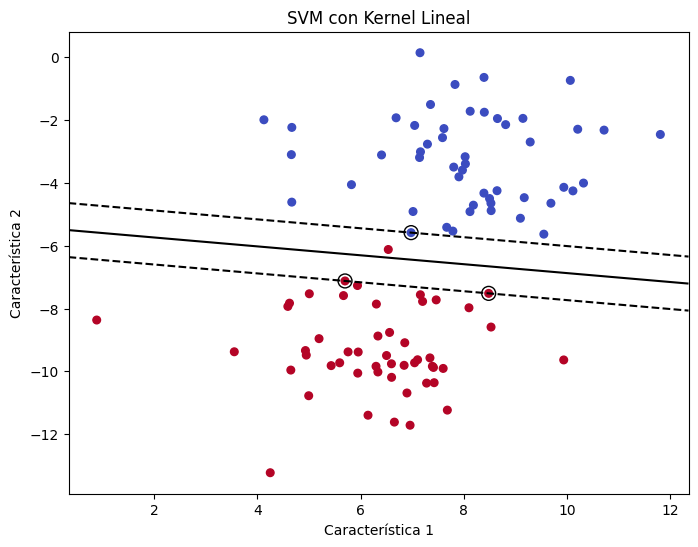

In [5]:
# Paso 1: Importar librerías
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Paso 2: Generar un conjunto de datos
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

# Paso 3: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Crear el modelo SVM con kernel lineal
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Paso 5: Evaluar el modelo
y_pred = model.predict(X_test)

print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Paso 6: Visualizar el resultado
def plot_svm(model, X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Crear malla de puntos
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Dibujar frontera de decisión y márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=['--', '-', '--'])

    # Dibujar vectores de soporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("SVM con Kernel Lineal")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

plot_svm(model, X, y)
